# Learn GeoPandas

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [3]:
world.head()

,continent,gdp_md_est,geometry,iso_a3,name,pop_est
0,Asia,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",AFG,Afghanistan,28400000.0
1,Africa,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,AGO,Angola,12799293.0
2,Europe,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",ALB,Albania,3639453.0
3,Asia,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",ARE,United Arab Emirates,4798491.0
4,South America,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,ARG,Argentina,40913584.0


In [4]:
world.shape

(177, 6)

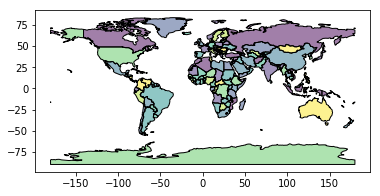

In [5]:
world.plot()

In [6]:
world.geometry.name


'geometry'

In [7]:
world = world.rename(columns={'geometry': 'borders'}).set_geometry('borders')
world.geometry.name

'borders'

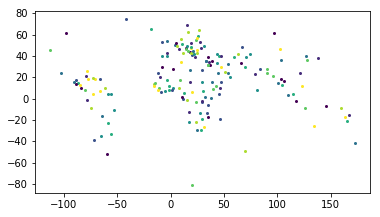

In [8]:
world['centroid_column'] = world.centroid
world = world.set_geometry('centroid_column')
world.plot()

In [9]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

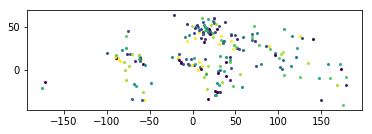

In [10]:
cities.plot()

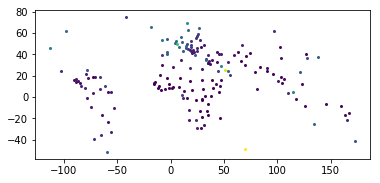

In [11]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap')

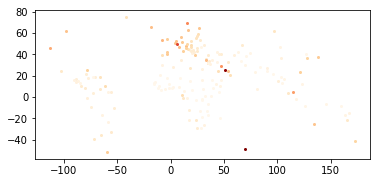

In [12]:
world.plot(column='gdp_per_cap', cmap='OrRd')

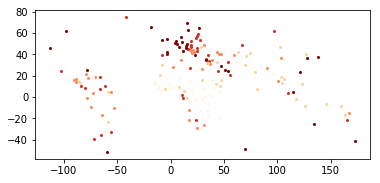

In [13]:
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles')

### Maps with Layers

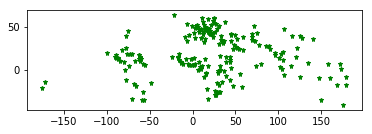

In [14]:
cities.plot(marker="*", color='green', markersize=5)

In [15]:
cities = cities.to_crs(world.crs)

#### Method 1

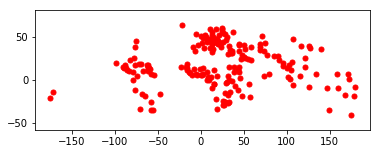

In [16]:
base = world.plot(color='white')
cities.plot(ax=base, marker='o', color='red', markersize=5)

#### Method 2

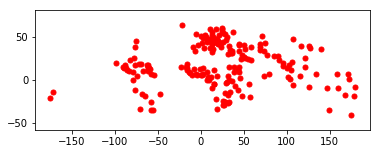

In [17]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

world.plot(ax=ax, color='white')
cities.plot(ax=ax, marker='o', color='red', markersize=5)

### Get the Philippines

In [54]:
x = world.name

In [75]:
y = [ph for ph in x if 'Phil' in ph]

In [76]:
y

['Philippines']

In [93]:
ph = gpd.GeoDataFrame()

for i in range(world.shape[0]):
    if world.loc[i]['name'] == 'Philippines':
        ph = world.loc[i]
ph

continent                                                       Asia
gdp_md_est                                                    317500
borders            (POLYGON ((126.3768135926375 8.414706325713354...
iso_a3                                                           PHL
name                                                     Philippines
pop_est                                                  9.79766e+07
centroid_column          POINT (122.9026723698869 11.76379936229766)
Name: 125, dtype: object

In [94]:
ph['borders'].plot()

AttributeError: 'MultiPolygon' object has no attribute 'plot'